In [162]:
import MLP.MLP_module as mlp
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
GW_data = pd.read_csv('data_for_MLP/training/_O4_MLP_data_HLV_1000000_det_H1_L1_V1_run_O4_approx_IMRPhenomXPHM_batch_1.csv')
GW_data.loc[:, 'geocent_time'] = GW_data['geocent_time'] % 86164.1

In [163]:
GW_data

,Unnamed: 0,luminosity_distance,mass_1,mass_2,a_1,a_2,tilt_1,tilt_2,ra,dec,theta_jn,phi_jl,phi_12,psi,geocent_time,snr_H1,snr_L1,snr_V1
0,0,2114.798760,162.182418,9.003463,0.961779,0.626577,1.252213,2.953142,0.116103,0.326014,1.952575,1.029444,5.271872,2.920556,5778.283682,6.930372,6.707387,1.976685
1,1,6846.975394,213.686928,2.425913,0.830968,0.867344,2.491620,0.309867,1.582515,0.580028,1.154670,0.079063,2.257911,0.168927,56019.404353,0.122867,0.157730,0.049036
2,2,4820.627852,140.395868,7.327653,0.664734,0.674808,1.782090,1.912492,5.687561,-0.881834,1.460116,3.749210,4.054006,1.004173,45194.930705,2.089052,1.542338,0.290370
3,3,8641.090835,209.468404,10.798941,0.414713,0.601820,1.272354,0.732176,1.881188,0.118481,1.715771,2.648582,5.953109,0.597371,52633.640804,0.040622,0.592023,0.329724
4,4,8581.934131,155.892610,9.180453,0.251794,0.567797,1.582250,0.971829,3.181396,0.498407,0.364315,5.379563,1.449079,2.420712,48418.905980,1.269775,1.165524,0.200539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,5375.427908,276.701475,12.176445,0.693238,0.660544,1.701703,0.511156,0.305766,-0.011994,2.287674,2.900015,2.139732,1.472195,31836.708095,0.384540,1.501553,0.732914
999996,999996,9344.916414,85.277921,1.847363,0.155516,0.090386,0.864633,2.241014,4.401343,-1.150869,2.351832,0.789463,3.105841,2.442876,20388.290514,0.574782,0.487600,0.172443
999997,999997,5823.325887,241.753319,6.252235,0.239789,0.700758,0.907930,0.470591,4.975108,1.381484,1.914985,1.130888,0.424408,0.053818,64178.462343,0.677965,0.504134,0.394252
999998,999998,8400.641323,347.684449,1.759955,0.942445,0.870219,2.422679,1.046901,5.938019,-0.702685,2.169658,3.322057,2.125832,0.940955,27141.544459,0.072122,0.084268,0.036380


In [164]:
# Split the DataFrame into input features (X) and target values (y)
X = GW_data[[ 'luminosity_distance', 'mass_1', 'mass_2', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'ra', 'dec', 'theta_jn', 'phi_jl', 'phi_12','psi','geocent_time']].values
y = GW_data[['snr_H1', 'snr_L1', 'snr_V1']].values


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and set device for the model
model = mlp.MLP(input_size=14, hidden_layers=[128]*4, output_size=3 )
model.set_device(device = 'cuda:0')
# Train the model with training and validation data
model.train_model(X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val, epochs=50, learning_rate = 0.001, batch_size = 50000, save_dir="models/MLP_models/testing_O4")

# Save the model and scalers to the specified folder
model.save_model(save_dir="models/MLP_models/testing_O4")



Epoch [50/50], Training Loss: 0.3502, Validation Loss: 0.8573
Model and scalers saved in folder: models/MLP_models/testing_O4


In [165]:
testing_data = pd.read_csv('data_for_MLP/testing/testing_data_10000_det_H1_L1_V1_run_O4_batch_1.csv')
testing_snrs = testing_data[['snr_H1', 'snr_L1', 'snr_V1']]
testing_data.loc[:, 'geocent_time'] = testing_data['geocent_time'] % 86164.1
testing_data = testing_data[[ 'luminosity_distance', 'mass_1', 'mass_2', 'a_1', 'a_2', 'tilt_1', 'tilt_2',
                             'ra', 'dec', 'theta_jn', 'phi_jl', 'phi_12','psi','geocent_time']].values

In [113]:
len(snr_H1)

400

/tmp/ipykernel_2393154/1614401577.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 0.95])


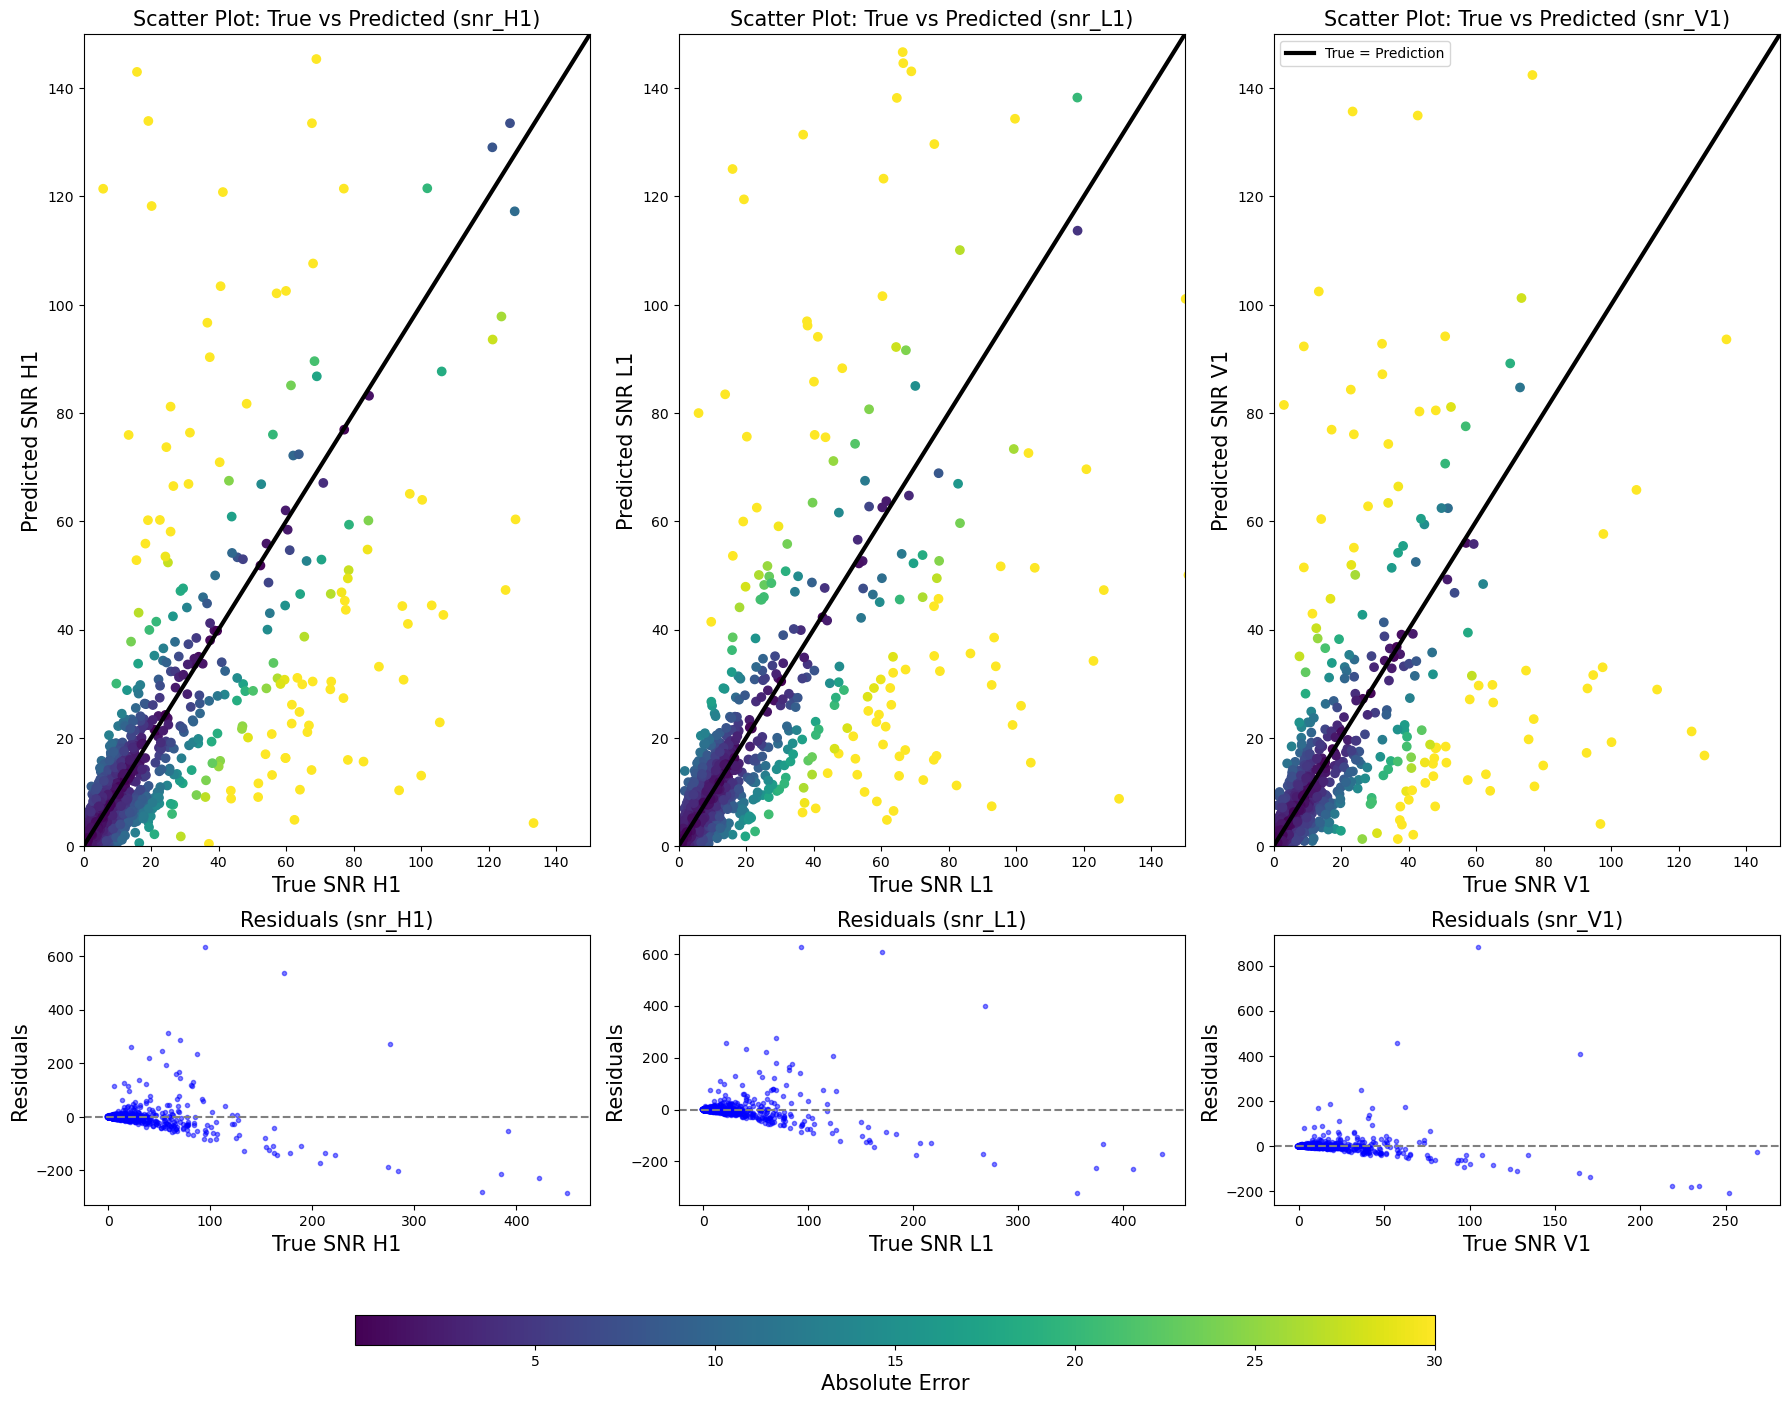

In [173]:
snrs = mlp.load_and_predict(testing_data, model_dir='models/MLP_models/testing_O4', device='cpu')
snr_H1, snr_L1, snr_V1 = snrs[:,0], snrs[:,1], snrs[:,2]


# Create horizontal subplots for scatter plots of predicted vs true SNR values with residuals below
fig, axes = plt.subplots(2, 3, figsize=(18, 15), gridspec_kw={'height_ratios': [3, 1]})

# True vs Predicted SNR H1
sc1 = axes[0, 0].scatter(x=snr_H1, y=testing_snrs.snr_H1.values, c=np.abs(snr_H1 - testing_snrs.snr_H1.values), cmap='viridis', vmax=30)
axes[0, 0].set_title('Scatter Plot: True vs Predicted (snr_H1)', fontsize=15)
axes[0, 0].set_xlabel('True SNR H1', fontsize=15)
axes[0, 0].set_ylabel('Predicted SNR H1', fontsize=15)
axes[0, 0].set_ylim([0, 150])
axes[0, 0].set_xlim([0, 150])
axes[0, 0].plot(np.linspace(0, 1000, 100), np.linspace(0, 1000, 100), '-k', linewidth=3)

# Residuals for SNR H1
residuals_H1 = testing_snrs.snr_H1.values - snr_H1
axes[1, 0].plot(snr_H1, residuals_H1, 'b.', alpha=0.5)
axes[1, 0].axhline(0, color='gray', linestyle='--')
axes[1, 0].set_xlabel('True SNR H1', fontsize=15)
axes[1, 0].set_ylabel('Residuals', fontsize=15)
axes[1, 0].set_title('Residuals (snr_H1)', fontsize=15)

# True vs Predicted SNR L1
sc2 = axes[0, 1].scatter(x=snr_L1, y=testing_snrs.snr_L1.values, c=np.abs(snr_L1 - testing_snrs.snr_L1.values), cmap='viridis', vmax=30)
axes[0, 1].set_title('Scatter Plot: True vs Predicted (snr_L1)', fontsize=15)
axes[0, 1].set_xlabel('True SNR L1', fontsize=15)
axes[0, 1].set_ylabel('Predicted SNR L1', fontsize=15)
axes[0, 1].set_ylim([0, 150])
axes[0, 1].set_xlim([0, 150])
axes[0, 1].plot(np.linspace(0, 1000, 100), np.linspace(0, 1000, 100), '-k', linewidth=3)

# Residuals for SNR L1
residuals_L1 = testing_snrs.snr_L1.values - snr_L1
axes[1, 1].plot(snr_L1, residuals_L1, 'b.', alpha=0.5)
axes[1, 1].axhline(0, color='gray', linestyle='--')
axes[1, 1].set_xlabel('True SNR L1', fontsize=15)
axes[1, 1].set_ylabel('Residuals', fontsize=15)
axes[1, 1].set_title('Residuals (snr_L1)', fontsize=15)

# True vs Predicted SNR V1
sc3 = axes[0, 2].scatter(x=snr_V1, y=testing_snrs.snr_V1.values, c=np.abs(snr_V1 - testing_snrs.snr_V1.values), cmap='viridis', vmax=30)
axes[0, 2].set_title('Scatter Plot: True vs Predicted (snr_V1)', fontsize=15)
axes[0, 2].set_xlabel('True SNR V1', fontsize=15)
axes[0, 2].set_ylabel('Predicted SNR V1', fontsize=15)
axes[0, 2].set_ylim([0, 150])
axes[0, 2].set_xlim([0, 150])
axes[0, 2].plot(np.linspace(0, 1000, 100), np.linspace(0, 1000, 100), '-k', linewidth=3, label='True = Prediction')
axes[0, 2].legend()

# Residuals for SNR V1
residuals_V1 = testing_snrs.snr_V1.values - snr_V1
axes[1, 2].plot(snr_V1, residuals_V1, 'b.', alpha=0.5)
axes[1, 2].axhline(0, color='gray', linestyle='--')
axes[1, 2].set_xlabel('True SNR V1', fontsize=15)
axes[1, 2].set_ylabel('Residuals', fontsize=15)
axes[1, 2].set_title('Residuals (snr_V1)', fontsize=15)

# Add a separate axis for the colorbar below the residuals
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(sc3, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Absolute Error', fontsize=15)

plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()


In [100]:
# Generate simple linear data for testing
def y_funct(x, a, b, c):
    return x**(2) * a + b*x + c

N = 10000
x_vals = np.linspace(-100, 100, N)
a, b, c = np.random.uniform(-10, 10, size=N), np.random.uniform(-10, 10, size=N), np.random.uniform(-10, 10, size=N)
y_vals = y_funct(x_vals, a, b, c) + np.random.normal(0, 1, size=len(x_vals))

# Stack x_vals to create the input feature matrix with a single feature (x)
X = np.vstack([x_vals, y_vals]).T
# Stack a and b to create the target matrix (predicting 'a' and 'b')
y = np.vstack([a, b, c]).T

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and set device for the model
# Since we are predicting two values (a and b), output_size is set to 2
model = mlp.MLP(input_size=2, hidden_layers=[64, 32, 16, 32, 64], output_size=3)
model.set_device(device = 'cuda:0')

# Train the model with training and validation data
model.train_model(X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val, epochs=100, batch_size = 10000, learning_rate = 0.001, save_dir="models/MLP_models/predict_a_b")

# Save the model and scalers to the specified folder
model.save_model(save_dir="models/MLP_models/predict_a_b")


Epoch [100/100], Training Loss: 0.7453, Validation Loss: 0.7436
Model and scalers saved in folder: models/MLP_models/predict_a_b


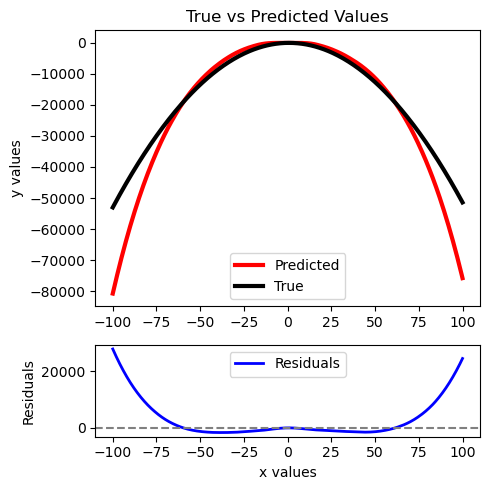

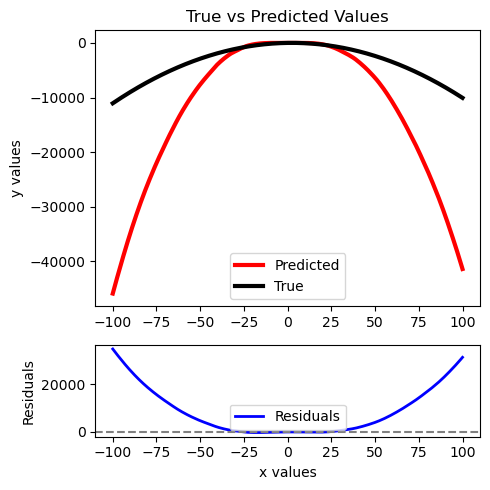

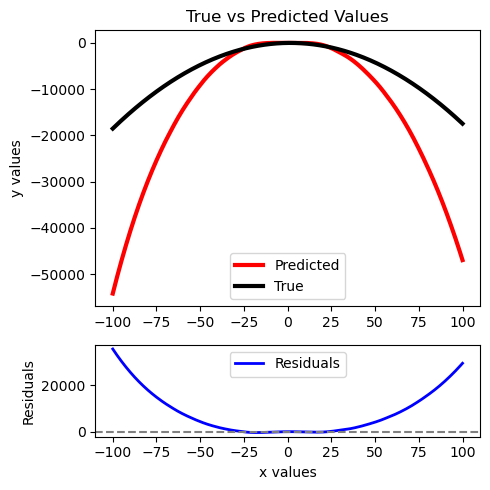

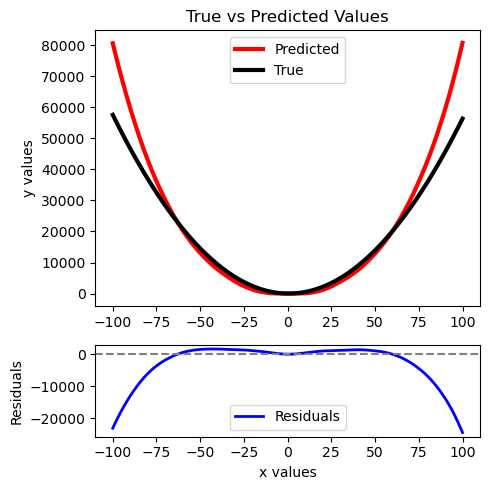

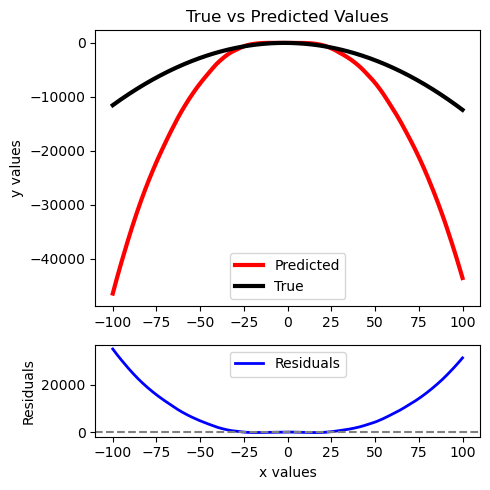

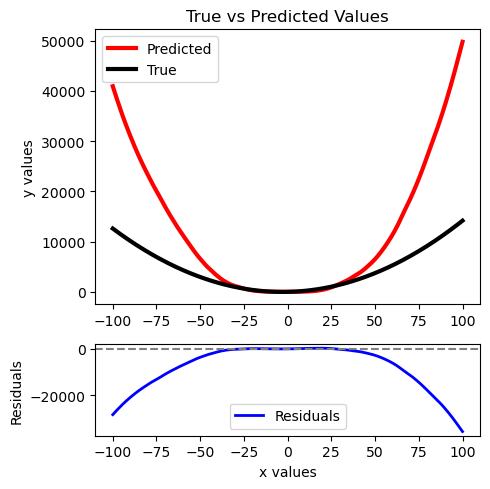

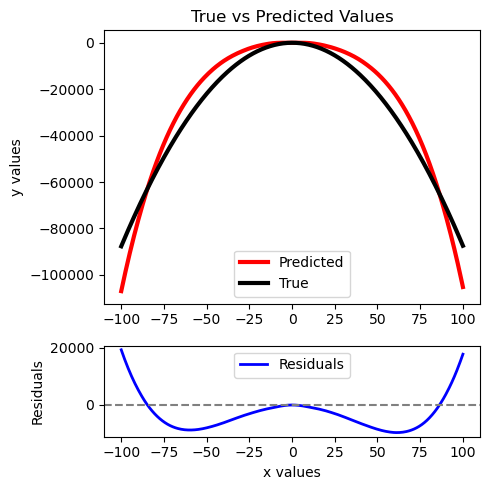

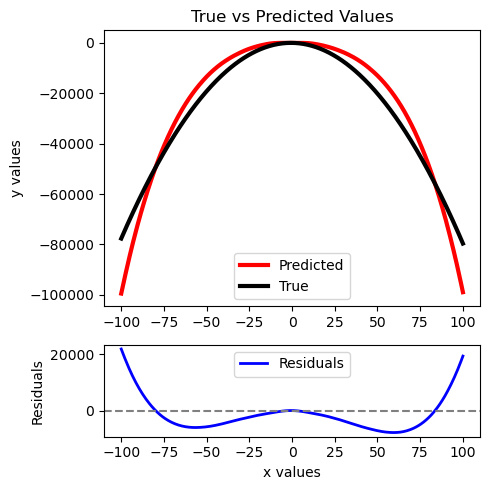

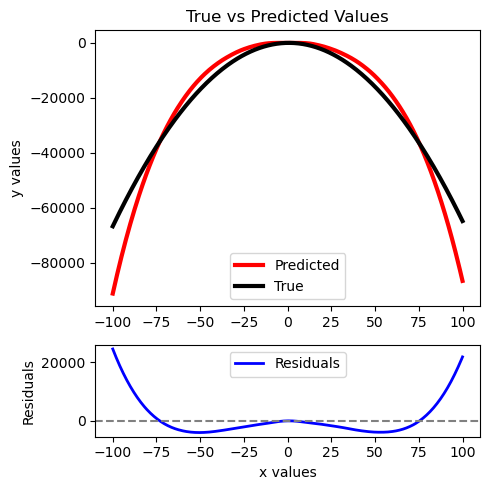

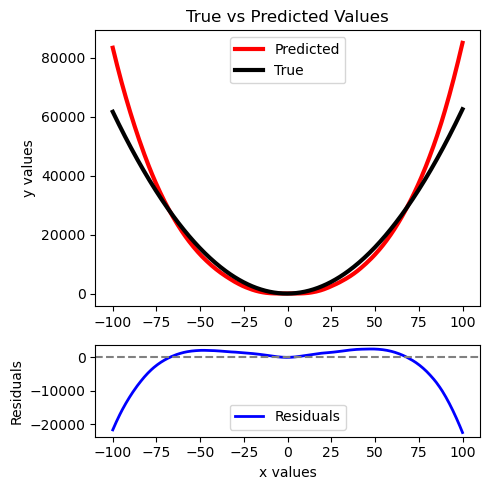

In [101]:
for i in range(10):
    # Generate new data for testing (extrapolation and interpolation)
    x_test_vals = np.linspace(-100, 100, 400)  # Generate 400 values from 0 to 120
    a,b,c = np.random.uniform(-10, 10, size=1), np.random.uniform(-10, 10, size=1), np.random.uniform(-10, 10, size=1)
    a_test, b_test, c_test = a*np.ones(400), b*np.ones(400), c*np.ones(400)
    y_test_vals = y_funct(x_test_vals, a_test, b_test, c_test) #+ np.random.normal(0, 1, size=len(x_test_vals))
    
    # Prepare test input features and target values
    X_test =np.vstack([x_test_vals, y_test_vals]).T

    ab_pred = mlp.load_and_predict(X_test, model_dir='models/MLP_models/predict_a_b', device='cpu')
    
    a_pred, b_pred, c_pred= ab_pred[:,0], ab_pred[:,1], ab_pred[:,2]
    
    # Plot predicted vs true values along with residuals
    fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize=(5, 5))
    
    # Plot true vs predicted y values
    ax1.plot(x_test_vals, y_funct(x_test_vals, a_pred, b_pred, c_pred), '-r', linewidth=3, label='Predicted')
    ax1.plot(x_test_vals, y_test_vals, '-k', linewidth=3, label='True')
    ax1.set_ylabel('y values')
    ax1.legend()
    ax1.set_title('True vs Predicted Values')
    
    # Calculate and plot residuals
    residuals = y_test_vals - y_funct(x_test_vals, a_pred, b_pred, c_pred)
    ax2.plot(x_test_vals, residuals, '-b', linewidth=2, label='Residuals')
    ax2.set_xlabel('x values')
    ax2.set_ylabel('Residuals')
    ax2.axhline(0, color='gray', linestyle='--')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
